In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [41]:
iris = load_iris()
X = iris.data[:, :3]   # sepal length & sepal width ONLY
y = iris.target


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.35,
    random_state=7,
    stratify=y
)



In [43]:
c45_tree = DecisionTreeClassifier(
    criterion="entropy",   # C4.5 style
    max_depth=2,           # VERY IMPORTANT
    min_samples_leaf=10,   # VERY IMPORTANT
    min_samples_split=20   # EXTRA CONTROL
)

c45_tree.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10,
                       min_samples_split=20)

In [44]:
y_pred = c45_tree.predict(X_test)


In [45]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall   :", recall_score(y_test, y_pred, average="macro"))
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy : 0.8867924528301887
Precision: 0.888888888888889
Recall   : 0.8845315904139434
F1 Score : 0.8848684210526315

Confusion Matrix:
 [[18  0  0]
 [ 0 16  2]
 [ 0  4 13]]


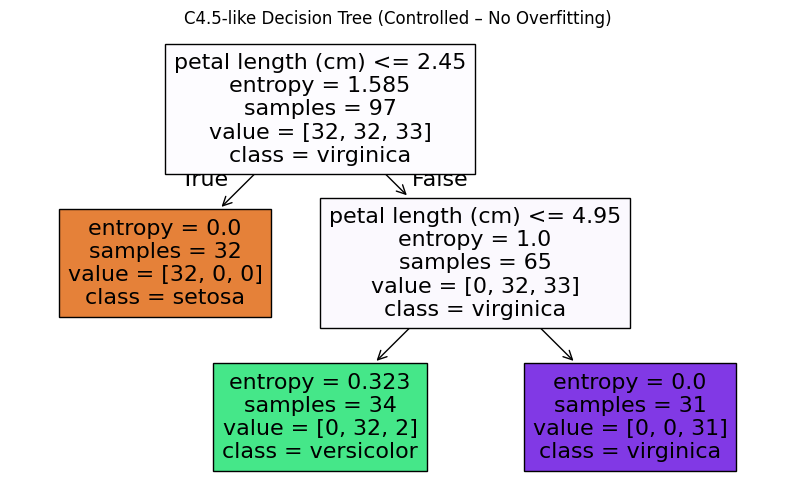

In [47]:
plt.figure(figsize=(10, 6))
plot_tree(
    c45_tree,
    feature_names=iris.feature_names[:3],
    class_names=iris.target_names,
    filled=True
)
plt.title("C4.5-like Decision Tree (Controlled – No Overfitting)")
plt.show()
